In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tools

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [123]:
def printvar(regr,deg=5):
    mse = regr.squared_error()
    r2 = regr.r2score()
    Bvar = np.sqrt(np.diag(regr.betaVar))
    print('MSE: ', mse)
    print('R2: ', r2)
    print('Conf. int.: ')
    for i in range(len(Bvar)):
        print('B{:}: {:f} {} {:f}'.format(i,regr.beta[i],u'\xb1',Bvar[i]))
        
    df = tools.get_exp_coeffs(beta=regr.beta,deg=deg, print_beta = False)
    plt.imshow(df)
    
    return mse,r2,Bvar

def printvar_lasso(mse,r2,Bvar,reg, deg = 5):
    print('MSE: ', mse)
    print('R2: ', r2)
    print('Conf. int.: ')
    for i in range(len(Bvar)):
        beta = reg.coef_[i]
        print('B{:}: {:f} {} {:f}'.format(i,beta,u'\xb1',Bvar[i]))
        
    df = tools.get_exp_coeffs(beta=beta,deg=deg, print_beta = False)
    plt.imshow(df)

## Ordinary linear regression
Make data

In [103]:
deg = 5
N = 2000
lambd = 0.01
noise = 0.1
x,y,z,noise = tools.generate_data(N=N, noise=noise)

X = tools.get_X_poly2D(x,y,deg=deg)

Do regression and print MSE, R2 and beta with conf.int.

MSE:  0.0125750726662
R2:  0.863756000942
Conf. int.: 
B0: 0.247483 ± 0.051057
B1: 4.973944 ± 0.506442
B2: 9.124338 ± 0.542930
B3: -13.261187 ± 2.352567
B4: -18.383438 ± 1.962966
B5: -38.887467 ± 2.486180
B6: -0.294743 ± 5.186986
B7: 26.697886 ± 3.998478
B8: 49.566257 ± 4.090812
B9: 55.766022 ± 5.423163
B10: 23.657213 ± 5.359660
B11: -36.273540 ± 4.167891
B12: -10.931655 ± 4.004091
B13: -56.736436 ± 4.294413
B14: -29.434423 ± 5.563347
B15: -15.186149 ± 2.090321
B16: 19.613951 ± 1.825141
B17: -4.869793 ± 1.836920
B18: 12.131748 ± 1.800641
B19: 19.230508 ± 1.875454
B20: 3.264156 ± 2.157502


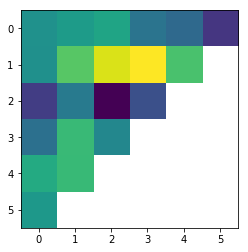

In [105]:
# X = tools.get_X_poly2D(x,y,deg=deg)
regr = tools.Regression(X,z,lmbd = 0)

zpred = regr.yhat

mse,r2,Bvar = printvar(regr)

In [ ]:
## VAR PLoT
# plt.figure(figsize=(10,6))
# plt.subplot(2,2,1)
# plt.imshow(Bvar)
# plt.subplot(1,2,2)
# plt.errorbar(np.arange(len(Bvar)), regr.beta/regr.beta, yerr = np.sqrt(np.diag(Bvar)), fmt=".")
# plt.tight_layout()

In [77]:
df = tools.get_exp_coeffs(Bvar)
df.columns = ['x^{}'.format(i) for i in df.columns]
df.index = ['y^{}'.format(i) for i in df.index]
print(df.to_latex(na_rep='', escape = False,  column_format='lllllll'))

      c:  0.05
    y^1:  0.48
    y^2:  0.47
    y^3:  2.21
    y^4:  1.78
    y^5:  2.20
   x^1 :  4.87
x^1 y^1:  3.69
x^1 y^2:  3.74
x^1 y^3:  4.87
x^1 y^4:  5.06
   x^2 :  3.93
x^2 y^1:  3.67
x^2 y^2:  3.98
x^2 y^3:  5.06
   x^3 :  2.00
x^3 y^1:  1.74
x^3 y^2:  1.71
   x^4 :  1.70
x^4 y^1:  1.75
   x^5 :  1.99
\begin{tabular}{lllllll}
\toprule
{} &       x^0 &       x^1 &       x^2 &       x^3 &       x^4 &       x^5 \\
\midrule
y^0 &  0.045241 &  0.477578 &  0.473107 &  2.211665 &  1.776748 &  2.201117 \\
y^1 &  4.869500 &  3.693231 &  3.737937 &  4.868020 &  5.064018 &           \\
y^2 &  3.927566 &  3.665026 &  3.977169 &  5.062300 &           &           \\
y^3 &  1.995442 &  1.744240 &  1.707438 &           &           &           \\
y^4 &  1.700617 &  1.751833 &           &           &           &           \\
y^5 &  1.987609 &           &           &           &           &           \\
\bottomrule
\end{tabular}



# Ridge regression

MSE:  0.0151454424493
R2:  0.835907457431
Conf. int.: 
B0: 0.880478 ± 0.056032
B1: 1.568853 ± 0.555796
B2: 1.361917 ± 0.595840
B3: -6.973863 ± 2.581830
B4: 1.099762 ± 2.154262
B5: -7.796491 ± 2.728465
B6: 2.902282 ± 5.692471
B7: -1.661771 ± 4.388140
B8: 2.377488 ± 4.489472
B9: 5.048270 ± 5.951663
B10: 5.116252 ± 5.881972
B11: -1.290958 ± 4.574063
B12: 1.626181 ± 4.394300
B13: 0.391874 ± 4.712915
B14: 4.798048 ± 6.105509
B15: -3.172578 ± 2.294028
B16: 1.294598 ± 2.003006
B17: -1.918561 ± 2.015932
B18: 1.169127 ± 1.976118
B19: -2.650503 ± 2.058222
B20: -4.356716 ± 2.367756


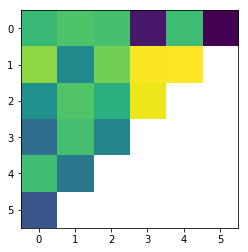

In [104]:
# X = tools.get_X_poly2D(x,y,deg=deg)
regr = tools.Regression(X,z,lmbd = lambd)

zpred = regr.yhat

mse,r2,Bvar = printvar(regr)

# Lasso regression

In [127]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha = lambd)
reg.fit(X,z)
zpred = reg.predict(X)

mse = tools.squared_error(z,zpred)
r2 = tools.r2score(z,zpred)
sigma = 1/(N-deg-1) * np.sum((z-zpred)**2)
Bvar = np.sqrt(np.diag(np.linalg.inv(X.T@X)*sigma))

printvar_lasso(mse,r2,Bvar,reg,deg)

MSE:  0.0352405199793
R2:  0.618188339875
Conf. int.: 
B0: 0.000000 ± 0.085127
B1: -0.273313 ± 0.844396
B2: -0.383378 ± 0.905234
B3: -0.284731 ± 3.922459
B4: -0.000000 ± 3.272874
B5: -0.000000 ± 4.145234
B6: -0.000000 ± 8.648317
B7: -0.000000 ± 6.666705
B8: -0.000000 ± 6.820653
B9: -0.000000 ± 9.042096
B10: -0.000000 ± 8.936217
B11: -0.000000 ± 6.949168
B12: -0.000000 ± 6.676063
B13: -0.000000 ± 7.160120
B14: -0.000000 ± 9.275826
B15: -0.000000 ± 3.485214
B16: -0.000000 ± 3.043077
B17: -0.000000 ± 3.062715
B18: -0.000000 ± 3.002227
B19: -0.000000 ± 3.126965
B20: -0.000000 ± 3.597225


IndexError: invalid index to scalar variable.